# Hands-on Machine Learning - Chapter 10 - Examples

# Setup

In [0]:
# Python 3.5 or above 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn version 0.20 or above
import sklearn
assert sklearn.__version__ >= "0.20"

# Tensorflow 2.0 or above required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports 
import numpy as np 
import os 

# Seeding random number generator to make output consistent across runs
np.random.seed(42)

# For plotting pretty figures
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Filepaths for saving figures
ROOT_DIR = '.'
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True) 

# Function for saving figures
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)

  if tight_layout:
    plt.tight_layout()

  plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore warnings for this notebook
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')


# Example 1 - Perceptron

In [0]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron # Implements single layer of TLUs

In [0]:
# Loading Iris flowers dataset
iris = load_iris() 
X = iris.data[:, (2, 3)]              # Petal length, petal width
y = (iris.target == 0).astype(np.int) # One-vs-rest classification for Setosa

In [0]:
# Instantiating, fitting, and evaluating a Perceptron classifier
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# Prediction for a petal length and width of 2cm/0.5cm
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)                         # Predicted to be a Setosa flower

[1]


## Visualizing Perceptron Behaviour
- A perceptron consists of a single layer of threshold logic units (TLUs).
- The decision boundary of an individual TLU is linear.
- This means the decision boundary of the Perceptron will also be linear, since its output is simply the collective output of all its TLUs. 

Saving figure perceptron_iris_plot


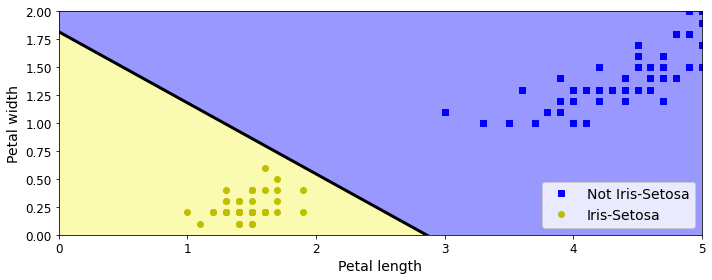

In [0]:
# Calculate the slope and intercept of the decision boundary
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# Grid of values between axes limits - will be used as test points
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

# Combine the two feature values as column vectors in a matrix
X_new = np.c_[x0.ravel(), x1.ravel()]

# Make predictions on the space of new data
y_predict = per_clf.predict(X_new)

# What is this?
zz = y_predict.reshape(x0.shape)

# Create a new figure
plt.figure(figsize=(10, 4))

# Index and plot all training samples with different labels according to their class
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo', label='Iris-Setosa')

# Plot the decision boundary - (x coordinates), (y coordinates)
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], 'k-', linewidth=3)

# Define colours for the contour map that shows the regions separated by the boundary
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# Plot a contour map
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# Save the figure
save_fig('perceptron_iris_plot')
plt.show()

# Example 2 - Activation Functions

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def relu(z):
  return np.maximum(0, z)

def derivative(f, z, eps=0.0000001):
  """Manually computing the derivative of a function based on first principles"""
  return (f(z + eps) - f(z - eps)) / (2 * eps)

Saving figure activation_functions_plot


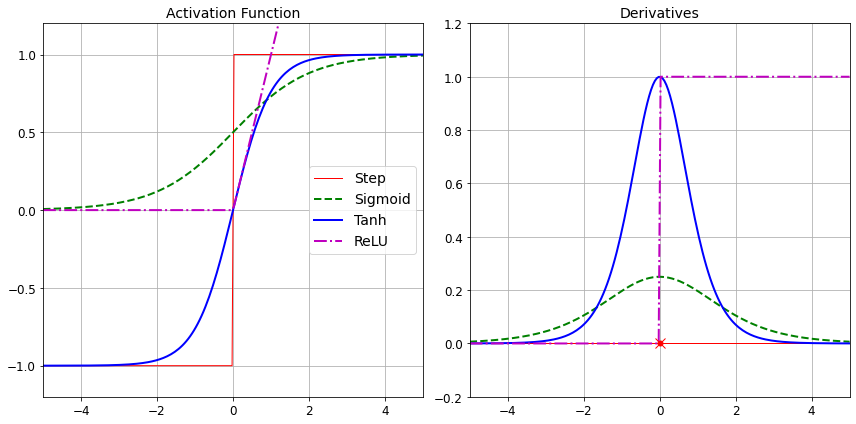

In [0]:
# Defining space of values to compute activation functions 
z = np.linspace(-5, 5, 200)

# Comparing relu and sigmoid activation functions side by side
plt.figure(figsize=(12, 6))

# FIRST PLOT - ACTIVATION FUNCTIONS
plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=1, label='Step')
plt.plot(z, sigmoid(z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-.', linewidth=2, label='ReLU')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Activation Function', fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# SECOND PLOT - DERIVATIVES OF ACTIVATION FUNCTIONS
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), 'r-', linewidth=1, label='Step')
plt.plot(z, derivative(sigmoid, z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, derivative(np.tanh, z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, derivative(relu, z), 'm-.', linewidth=2, label='ReLU')

# Adding markers at (0, 0) to highlight discontinuities in gradients
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)

# Redefining axis limits
plt.axis([-5, 5, -0.2, 1.2])

plt.grid(True)
plt.title('Derivatives', fontsize=14)

save_fig('activation_functions_plot')

# `tf.keras`

`tf.keras` is an implementation of the `keras` API that is different from the vanilla `keras` implementation designed by the `keras-team`. 

In addition to all the features implemented by the original creators of `keras`, `keras-tf` also provides an API for using `tensorflow`-specific features. 

In [22]:
import tensorflow as tf 
from tensorflow import keras

# Are we using version 2.0 or above?
print("Tensorflow Version", tf.__version__)

# What is the keras version?
print("Keras Version", keras.__version__) # -tf shows that it implements tf-specific features too

Tensorflow Version 2.2.0-rc3
Keras Version 2.3.0-tf


# Example 3 - Image Classifer with `tf.keras`

Using the Fashion-MNIST dataset, which is slightly more challenging to solve than the MNSIT digits dataset.

However, it still has 70k 28-by-28 px images, and each of these images belong to one of 10 classes, just like the MNIST digits dataset.

In [0]:
# Loading Data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train_full.shape

(60000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
X_train_full.dtype

dtype('uint8')

There are two major differences between the MNIST data imported with `sklearn` and that imported with `keras.datasets`.
- Each example is no longer a 1D array of 784 pixel values, but rather a 28 by 28 2D array of pixel values.
- These pixel values are no longer floating point numbers. Instead, they are 8 bit unsigned integers.

## Feature Scaling and Validation Data
- Extracting valiidaton data from the training data.
- Scaling the pixel intensites by manually dividing by 255 (the maximum value of a pixel intensity).
- Also converting them to floating-point values.

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 

In [0]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Class Names

Need to know mappings between class integers and the article of clothing they represent.

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [30]:
# Can use these class names to find the type of clothing for each example
class_names[y_train[0]]

'Coat'

## MNIST Model - Sequential API

In [0]:
# Instantiate a Sequential model - a sequential stack of neural network layers
model = keras.models.Sequential()

# Add layers one by one to the model 

# Convert 2D input array to 1D vector - it has no learnable parameters
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Dense layer: each of the 300 neurons is connected by a weight to every neuron
# in the previous layer, along with a vector of bias terms (one per neuron)
model.add(keras.layers.Dense(300, activation='relu'))

# Second dense layer 
model.add(keras.layers.Dense(100, activation='relu'))

# Final dense layer - one unit per class, and because classes are exclusive,
# We use the softmax activation function
model.add(keras.layers.Dense(10, activation='softmax'))

In [0]:
# Can also instantiate a model by passing a list of layers
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]), 
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [33]:
# Display a formatted list of all the layers that make up the model
# Along with theyr names, output shapes, and number of parameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Accessing Model Attributes

In [34]:
# Can iterate over the layers in a model like this
model.layers

In [35]:
# model.layers is an iterable of objects, so can be indexed
model.layers[1].name

'dense_12'

In [37]:
# Can also use methods that are called on model 
model.get_layer('dense_12').name

'dense_12'

In [0]:
# Can access and modify weights of a biases of layers too
hidden1 = model.layers[1]

# `get_weights` will return both weights and biases separately
weights, biases = hidden1.get_weights()

In [40]:
weights

array([[ 0.00086305,  0.03555709, -0.0651176 , ...,  0.06457838,
        -0.06877986, -0.03905503],
       [-0.02205615, -0.00141451, -0.04783842, ...,  0.02756567,
        -0.01292818, -0.05715518],
       [ 0.02462319, -0.03509757,  0.00977196, ..., -0.04900217,
        -0.0426376 , -0.02407257],
       ...,
       [-0.00890683, -0.0678853 ,  0.03363097, ..., -0.04224531,
        -0.04053664,  0.03851693],
       [-0.05798389,  0.02285148,  0.05275621, ..., -0.06094335,
         0.04417343,  0.0141556 ],
       [ 0.07401396, -0.06056695, -0.05401753, ...,  0.0514818 ,
        -0.04754713, -0.05215546]], dtype=float32)

In [44]:
weights.shape # (784, 300) randomly initialised weights to break weight symmetry

(784, 300)

In [42]:
biases # All zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
biases.shape

(300,)

## Compiling Model

After a model has been built, we use `compile` to specify 
- the loss functon (a numerical measure of the 'difference' between the predicted and actual outputs for a given training example)
- the optimizer (what variant of gradient descent to use to minimise the loss)
- metrics (any other numerical measures of how well our model is performing during training).

We are using sparse categorical crossentropy because our output is a single class label (an integer) instead of a vector of target probabilities per class (in which case we would use `categorical_crossentropy`.


In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## Training the Model

In [46]:
history = model.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7082 - accuracy: 0.7664 - val_loss: 0.5075 - val_accuracy: 0.8304
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4893 - accuracy: 0.8303 - val_loss: 0.4757 - val_accuracy: 0.8272
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4449 - accuracy: 0.8426 - val_loss: 0.4179 - val_accuracy: 0.8568
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4167 - accuracy: 0.8540 - val_loss: 0.3981 - val_accuracy: 0.8642
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3964 - accuracy: 0.8613 - val_loss: 0.4059 - val_accuracy: 0.8588
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3793 - accuracy: 0.8659 - val_loss: 0.3768 - val_accuracy: 0.8670
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3658 - accuracy: 0.8700 - val_loss: 0.3646 - val_accuracy:

## Visualizing History

In [0]:
import pandas as pd

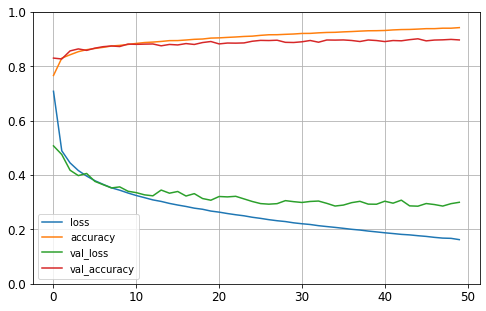

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim([0, 1])    # Set vertical range to [0 - 1]
plt.show()

## Evaluating Model on the Test Set

In [49]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
y_pred = model.predict_classes(X_new)
y_pred  

array([9, 2, 1])

# Example 4 - California Housing Prices (Sequential API)

In [0]:
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
# Fetch the data
housing = fetch_california_housing()

In [0]:
# Train-test split - need to specify X and y as attributes of `housing` 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [0]:
# Another train test split to extract validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [0]:
# Feature Scaling 
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_valid_scaled = standard_scaler.transform(X_valid)
X_test_scaled = standard_scaler.transform(X_test)

In [0]:
# Build model
house_model = keras.models.Sequential([
        # noisy data, so a single layer with fewer neurons to prevent overfitting
        keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),

        # Output layer has single linear unit so it can produce any range of values 
        keras.layers.Dense(1)
])

In [0]:
# Compile model
house_model.compile(loss='mean_squared_error', 
              optimizer='sgd')

In [101]:
# Train the model, save its history
house_model_history = house_model.fit(X_train_scaled, y_train,
                                      validation_data=(X_valid_scaled, y_valid), 
                                      epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7980 - val_loss: 0.5654
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5276 - val_loss: 0.5064
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5054 - val_loss: 0.4824
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5084 - val_loss: 0.4754
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4540 - val_loss: 0.4630
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4649
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4250 - val_loss: 0.4536
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4153 - val_loss: 0.4385
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4072 - val_loss: 0.4358
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4013 - val_loss: 0.4318

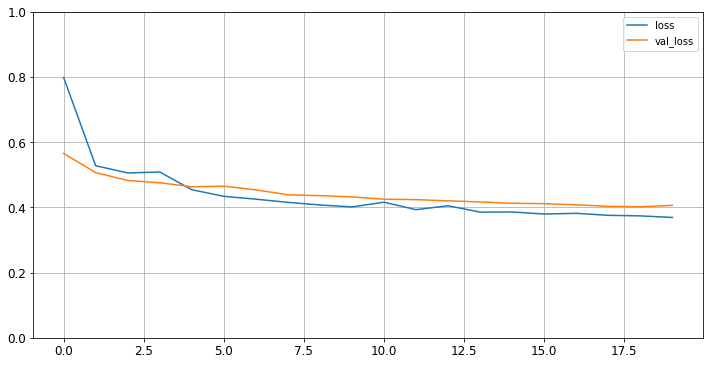

In [102]:
# What does the training history look like?
pd.DataFrame(house_model_history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
# Evaluating the model
mse_test = house_model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3949


In [107]:
y_pred = house_model.predict(X_test_scaled[:3])
y_pred

array([[0.8423238],
       [2.138611 ],
       [2.6149247]], dtype=float32)

In [108]:
y_test[:3]

array([1.303, 1.604, 4.175])